In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d

from dotenv import load_dotenv, find_dotenv
from pathlib import Path

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()
project_dir = Path(dotenv_path).parent

# load up the entries as environment variables
load_dotenv(dotenv_path)

True

# Loading

/home/ctc_das/Desktop/part_counting/data/raw/render_results/simulacao197/simulacao197_0072.png


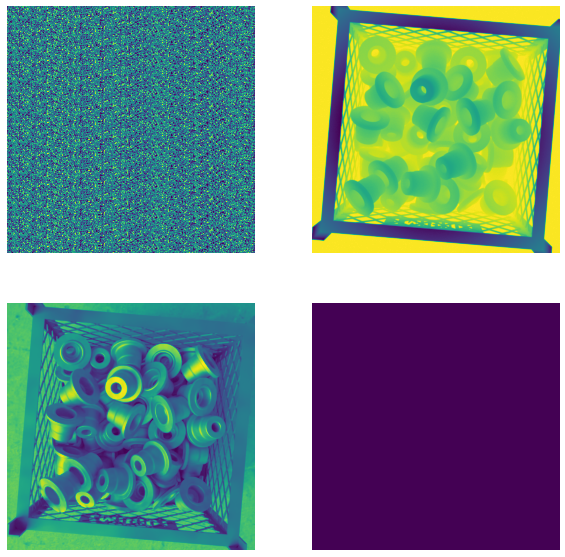

In [3]:
raw_data_dir = project_dir/'data/raw/render_results'

img_fpath = np.random.choice(list(raw_data_dir.glob('simulacao*/*.png')))
print(img_fpath)

img_data = np.asarray(o3d.io.read_image(str(img_fpath)))

fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(img_data[:,:,i])
    ax.set_axis_off()

fig.show()

# Faux-RGBD

Gray-scale with depth.

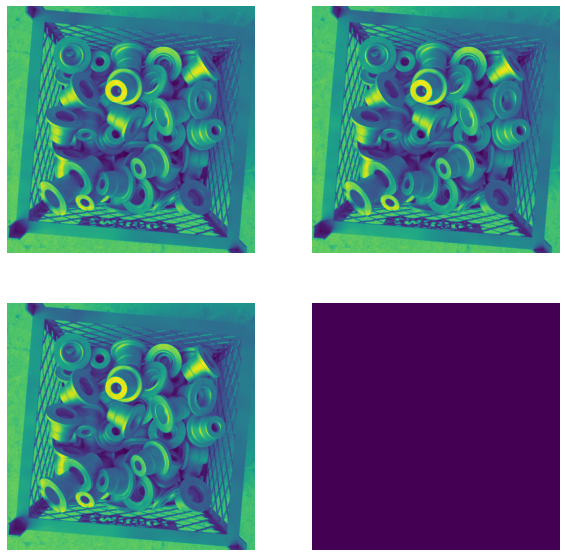

In [16]:
color_data = np.repeat(img_data[:,:,2][...,None],4,-1)
color_data[:,:,-1] = img_data[:,:,-1]

fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(color_data[:,:,i])
    ax.set_axis_off()

fig.show()

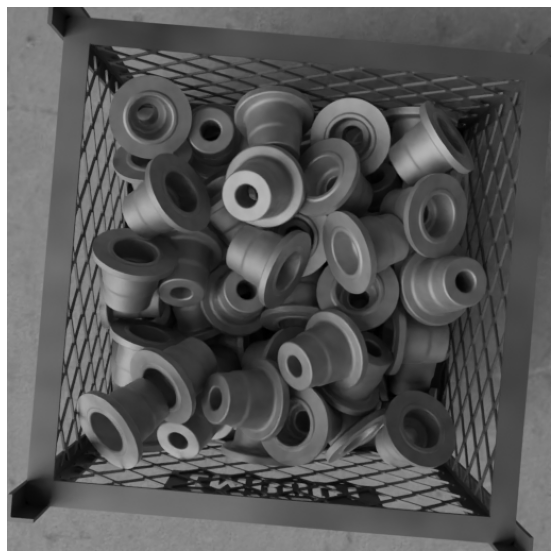

In [18]:
fig, ax = plt.subplots(1)
fig.set_size_inches(10,10)

ax.imshow(color_data)
ax.set_axis_off()

fig.show()

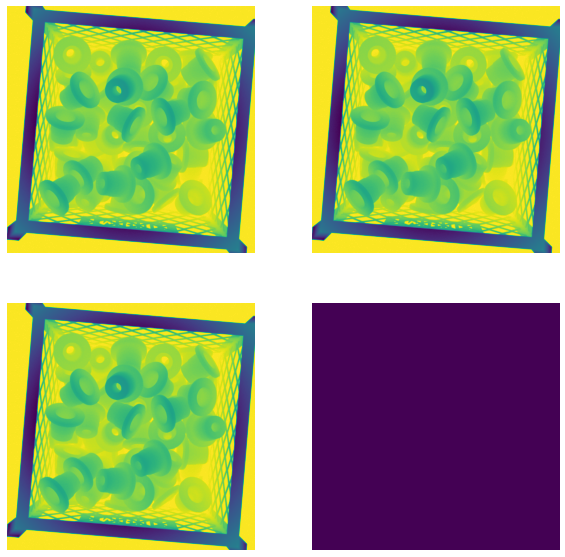

In [19]:
depth_data = np.repeat(img_data[:,:,1][...,None],4,-1)
depth_data[:,:,-1] = img_data[:,:,-1]

fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(depth_data[:,:,i])
    ax.set_axis_off()

fig.show()

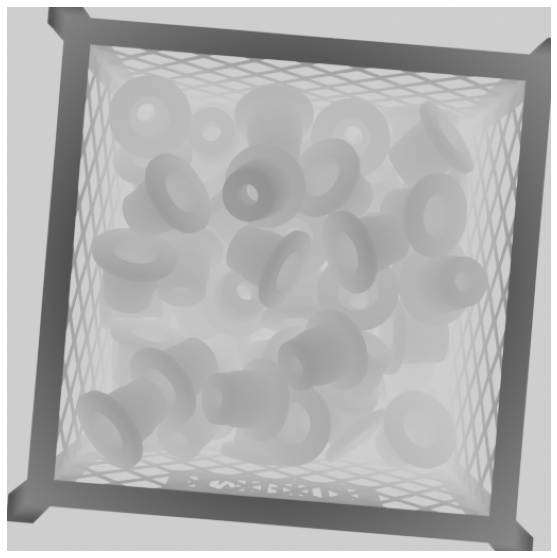

In [20]:
fig, ax = plt.subplots(1)
fig.set_size_inches(10,10)

ax.imshow(depth_data)
ax.set_axis_off()

fig.show()

# Open3D RGBD

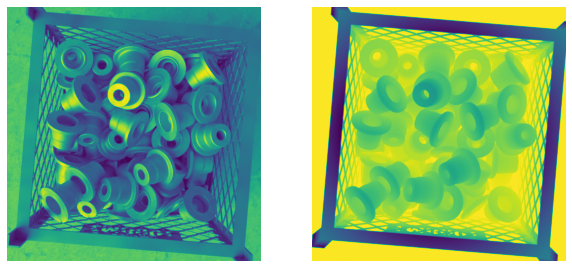

In [62]:
color_img = o3d.geometry.Image(img_data[:,:,2].astype('uint8'))
depth_img = o3d.geometry.Image(img_data[:,:,1].astype('uint8'))

rgbd_img = o3d.geometry.RGBDImage.create_from_color_and_depth(color_img, depth_img)

fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,10)

axs[0].imshow(rgbd_img.color)
axs[1].imshow(rgbd_img.depth)

axs[0].set_axis_off()
axs[1].set_axis_off()

fig.show()